# The Multi Tier Framework for measuring energy access in Nepal




As reported by [The MTF survey data ](https://mtfenergyaccess.esmap.org/country/nepal) in 2017, Nepal shows that 71.7% of households have grid access, while 23% have access through off-grid solutions.  Using the MTF definition of access, 93.7% of households nationwide are in Tier 1 or above for access to electricity.

To learn more about energy access in Nepal, download MTF’s Country Diagnostic Report,[here](esmap-mtf-data/Nepal/references/mtf-energy-access-country-diagnostic-report_nepal-9.2019.pdf)

## The structure of the database

- Section A: Household Roster
- Section B: Household Characteristics
- Section C: Supply and Demand of Electricity 
- Section D: Willingness to pay for a grid connection
- Section E: Willingness to pay for improved electricity supply
- Section F: Willingness to pay for solar device
- Section J: Use of cooking Solutions
- Section K: Space and Water heating 
- Section L: Willingness to pay for an improved cookstove
- Section M: Consumption / Expenditure
- Section N: Households Assets : Transport and Agriculture Equipment Ownership and Total
- Section O: Household land ownership and other assets
- Section P: Household economiv shocks
- Section Q: Street Ligthing
- Section R: Time use
- Section S: Health impacts
- Section T: Attitudes
- Section U: Women's empowerment 




Section C contains the informations related to Supply and Demand electricity. 

In [1]:
# Importing necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from IPython.display import Image
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading main dataset into python

main_dataset = pd.read_csv("raw_data/csv/main.csv")
main_dataset.drop('Unnamed: 0', axis = 1, inplace = True)
#main_dataset

# This may not be needed, but decideced to read it
codebook = pd.read_excel('references/codebook.xlsx')


In [3]:
main_dataset.head()


,HHID,Id,Date_HH_Visit,Eco_Reg,Province,Dev_Region,Zone,VDC_MUN,VDC_MUN_NAME,District,...,M32,M33,O1,O2,O2_SO,O2_SO_Recode,O3,O3_con,O4,TIME_END_VISIT1
0,110148801,2cd3defe83504f3593c43b93509a4c9f,2017-11-11,1,1,1,1,1,Khewang,1,...,8000.0,5000.0,1,1.0,NaN,NaN,8.0,0.406990,1200000.0,2017-11-11T02:49:33Z
1,110148802,d85646020ba744eb9b1b4bf76ca4e454,2017-11-11,1,1,1,1,1,Khewang,1,...,0.0,0.0,1,1.0,NaN,NaN,15.0,0.763106,2000000.0,2017-11-11T04:04:27Z
2,110148803,d8612908fadc4ba58c01a706a7e5ef64,2017-11-11,1,1,1,1,1,Khewang,1,...,15000.0,10000.0,1,1.0,NaN,NaN,9.0,0.457863,1350000.0,2017-11-11T04:47:09Z
3,110148804,9157d2376525473f925444bf756cdbe7,2017-11-11,1,1,1,1,1,Khewang,1,...,0.0,0.0,1,1.0,NaN,NaN,8.0,0.406990,1000000.0,2017-11-11T05:41:59Z
4,110148805,b84e1ea7a450429c8a90de5f2a42fe4b,2017-11-11,1,1,1,1,1,Khewang,1,...,0.0,0.0,1,1.0,NaN,NaN,5.0,0.254369,600000.0,2017-11-11T07:00:32Z


In [4]:
# Exploring the shape and columns names of the dataset

print(main_dataset.shape)
print(main_dataset.columns)

column_names = main_dataset.columns
household_info_columns = column_names[:19]
# electricity_df[household_info_columns].head()

(6000, 1247)
Index(['HHID', 'Id', 'Date_HH_Visit', 'Eco_Reg', 'Province', 'Dev_Region',
       'Zone', 'VDC_MUN', 'VDC_MUN_NAME', 'District',
       ...
       'M32', 'M33', 'O1', 'O2', 'O2_SO', 'O2_SO_Recode', 'O3', 'O3_con', 'O4',
       'TIME_END_VISIT1'],
      dtype='object', length=1247)


## section c creation from the main dataset
The section c relates to electricity access in Nepal

In [5]:
# Forming new dataframe of section C

c_section = [column for column in column_names if column.startswith('C')]
type(c_section)
c_section[4:]
c_section.sort()

c_section
target_columns = list(itertools.chain(household_info_columns ,c_section))
electricity_df = main_dataset[target_columns]
electricity_df.head()




,HHID,Id,Date_HH_Visit,Eco_Reg,Province,Dev_Region,Zone,VDC_MUN,VDC_MUN_NAME,District,...,C97,C98,C99,C9_A,CF_F,CF_Stove,CONSENT,C_AVAILABLE,C_DATE_TIME,C_WHO
0,110148801,2cd3defe83504f3593c43b93509a4c9f,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0
1,110148802,d85646020ba744eb9b1b4bf76ca4e454,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,3000.0,1,1,NaN,0
2,110148803,d8612908fadc4ba58c01a706a7e5ef64,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,1500.0,1,1,NaN,0
3,110148804,9157d2376525473f925444bf756cdbe7,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,5000.0,1,1,NaN,0
4,110148805,b84e1ea7a450429c8a90de5f2a42fe4b,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,1500.0,1,1,NaN,0


# Access to Electricity using Binary method (Nepal)
Section C starts from C2 to C182 column from the main_dataset.  

For Further analysis Specific column will be selected from the main dataset dataframe.

## Connection to the national grid 
From **C2.Is the household connected to the national grid? ** 

1: Yes  ,  2: No 

In [6]:

grid_connection_column = main_dataset["C2"]

grid_connection_column.replace({1:'grid Connected',2:'Not grid Connected'}, inplace=True)
perc_grid_connection = (grid_connection_column.value_counts(normalize = True)*100)
perc_grid_connection



grid Connected        67.45
Not grid Connected    32.55
Name: C2, dtype: float64

In [7]:
# labels = "National Grid Connection",  "Not Connected to the grid"
# explode = (0.1, 0.01) 
# fig1, ax1 = plt.subplots()
# ax1.pie(Perc_Grid_connection, explode=explode, labels=labels, autopct='%1.0f%%',shadow=True, startangle=90)
# ax1.axis('equal')
# #ax1.title("Nepal Grid connection ")
# ax1.set_title("Nepal Grid connection")
# plt.show()

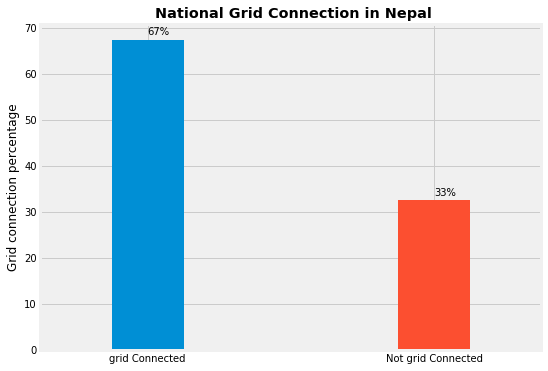

In [8]:

perc_grid_connection.plot(kind = 'bar',width = 0.25,figsize=(8,6))
plt.xticks(rotation=0)
plt.title(" National Grid Connection in Nepal",fontweight='bold')
plt.ylabel('Grid connection percentage')

for index, value in enumerate(perc_grid_connection.values):
    plt.text(index,value+1, f'{value:.0f}%');


### Observation from  Nepal  national grid connection  bar graph
From the mtf Nepal energy access, the report claims that 71.1% and 23% households are and not  connected to the national grid respectively. However by looking on the above pie chart from the raw data,  67% households are connected to the national grid, while 33% are not not connected to the  grid 

### main services for the grid connection 


From C7.Who is the service provider of the grid connection: 

- 01: Nepal Electricity Authority(NEA)
- 02: Other Private Electricity Providers

In [9]:
service_provider = electricity_df['C7']


# #service_provider_def = service_provider.to_frame()
service_provider.fillna(0, inplace = True)
service_provider.replace({1:'Nepal Electricity Authority',0: 'No response',2:' Private Electricity Providers'}, inplace=True)
service_provider_perc = (service_provider.value_counts(normalize = True)*100)
service_provider_perc

Nepal Electricity Authority       67.116667
No response                       32.550000
 Private Electricity Providers     0.333333
Name: C7, dtype: float64

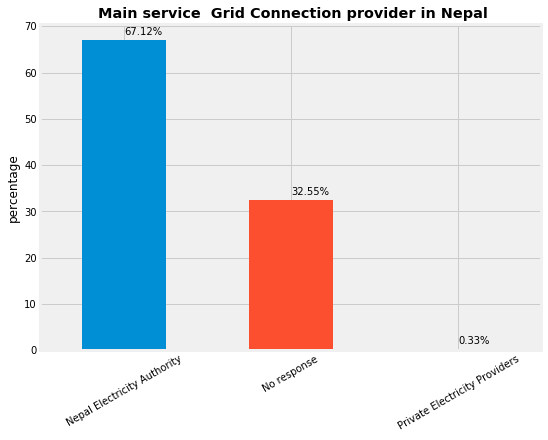

In [10]:


# Visualizing the main service provide in Nepal

service_provider_perc.plot(kind = 'bar',width = 0.5,figsize=(8,6))
plt.xticks(rotation=30)
plt.title(" Main service  Grid Connection provider in Nepal",fontweight='bold')
plt.ylabel('percentage')

for index, value in enumerate(service_provider_perc.values):
    plt.text(index,value+1, f'{value:.2f}%');

67.12% of the households  connected to the national grid pay to the Nepal Electricity Authorithy (NEA) and few households are connected to private service provider which accounts for 0.33%. However 32% did nm't respond to the question.



### Reasons households not connected to the grid 
C4. What is the main reason why your household is not connected to the grid? 
- 001 : Grid is too far from household/not available
- 002 : Cost of initial connection is too expensive
- 003: Monthly fee is too expensive
- 004: Satisfied with current energy solution 
- 005: Renting, Landlord decision
- 006: Service Unreliable
- 007: Administrative procedure is too complicated
- 008: Submitted application and waiting for connection
- 009: Company refused to connect the household
- 555: Other, specify



In [11]:
reason_no_grid_connection =  electricity_df["C4"]
reason_no_grid_connection.dropna(inplace = True)
reason_no_grid_connection.isnull().sum()
perc_reason_no_grid_connection = (reason_no_grid_connection.value_counts(normalize = True)*100)
perc_reason_no_grid_connection

1.0      69.687660
2.0       9.011777
7.0       8.653354
8.0       4.557092
4.0       3.942652
555.0     1.689708
6.0       1.280082
3.0       0.512033
9.0       0.409626
5.0       0.256016
Name: C4, dtype: float64

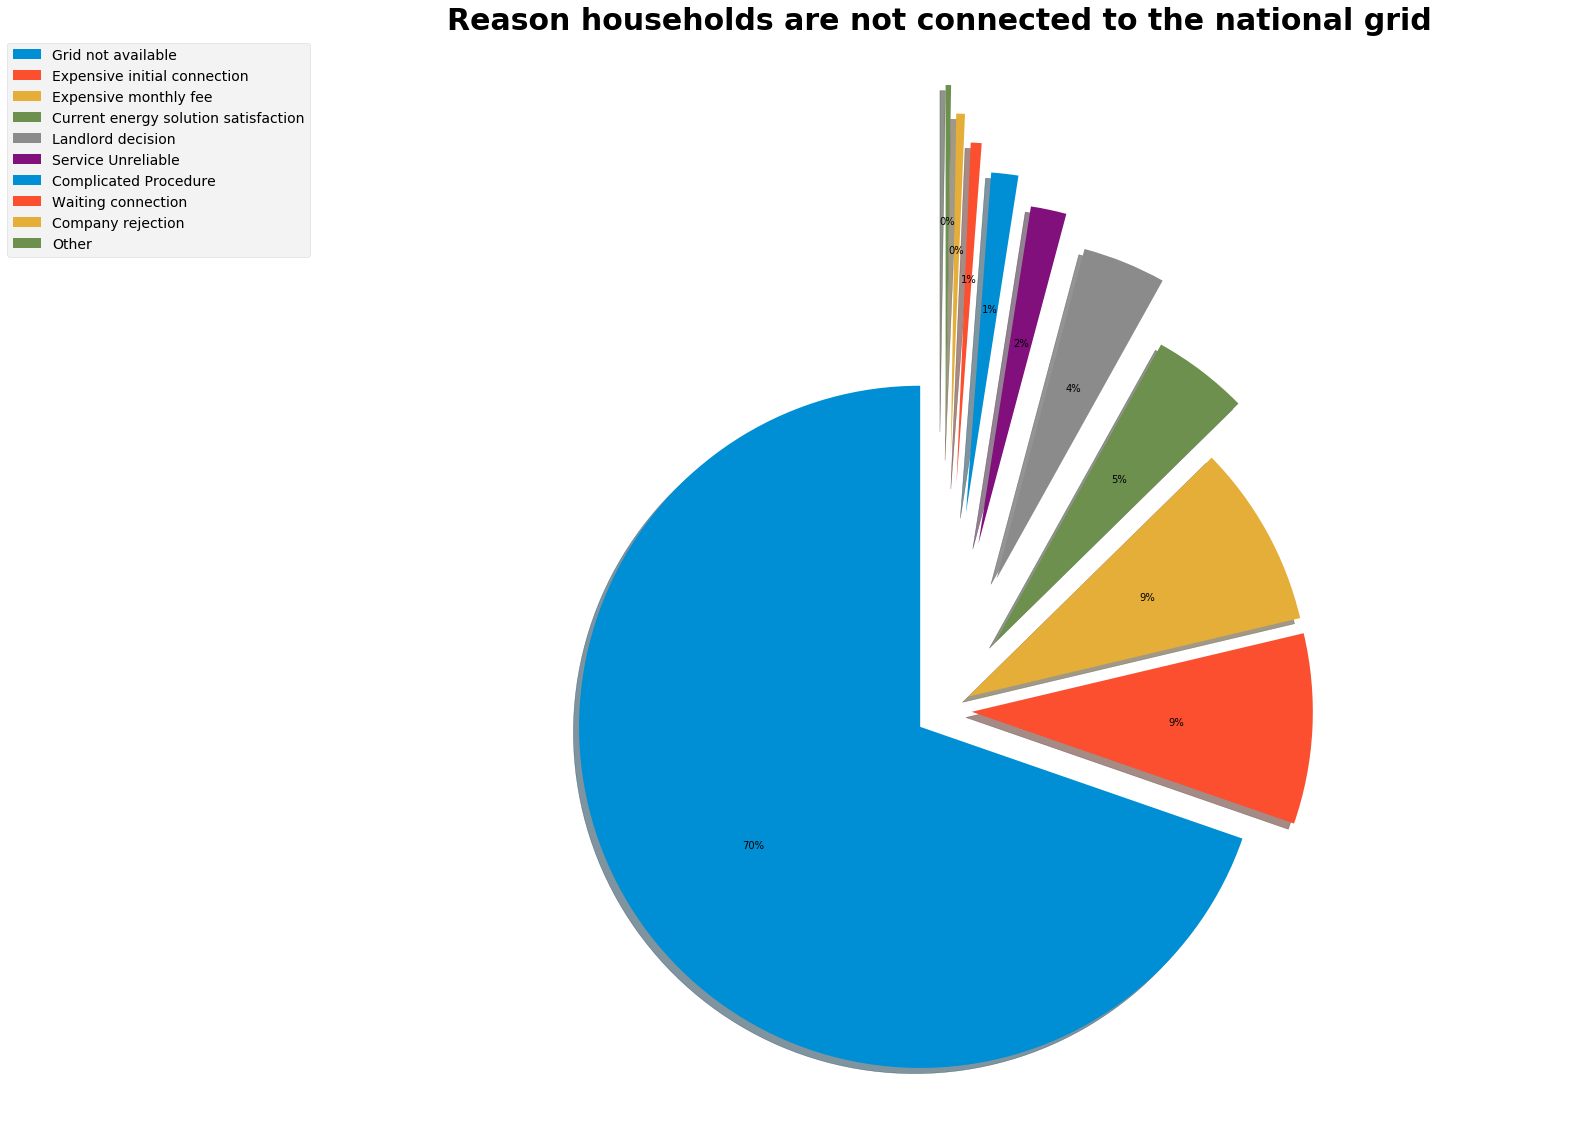

In [12]:
#Visualizing the reasons why households are not connected to the grid 

labels ="Grid not available","Expensive initial connection","Expensive monthly fee","Current energy solution satisfaction","Landlord decision","Service Unreliable","Complicated Procedure","Waiting connection","Company rejection","Other"

explode = (0.1,0.1,0.1,0.3,0.5,0.6,0.7,0.8,0.9,1) 
fig1, ax1 = plt.subplots(figsize=(20,20))
patches, texts, auto = ax1.pie(perc_reason_no_grid_connection, explode=explode, autopct='%1.0f%%',shadow=True, startangle=90,radius=1.2)

#patches, texts, auto = ax1.pie(Perc_reason_no_grid_connection, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )
 
plt.legend(patches, labels,loc="left center",bbox_to_anchor=(-0.001, 1.),fontsize=14)
#ax1.title("Nepal Grid connection ")
ax1.axis('equal')
ax1.set_title("Reason households are not connected to the national grid ",fontweight='bold',fontsize=30)
plt.show()


#ax = Perc_reason_no_grid_connection.plot.bar(rot= 30)


From the above pie chart, 70% households were not connected to the grid due to its unavailability. 

### Main source of electricity nationawide
The question C175 specify the main source of households'electricity.
From the report page 38 96


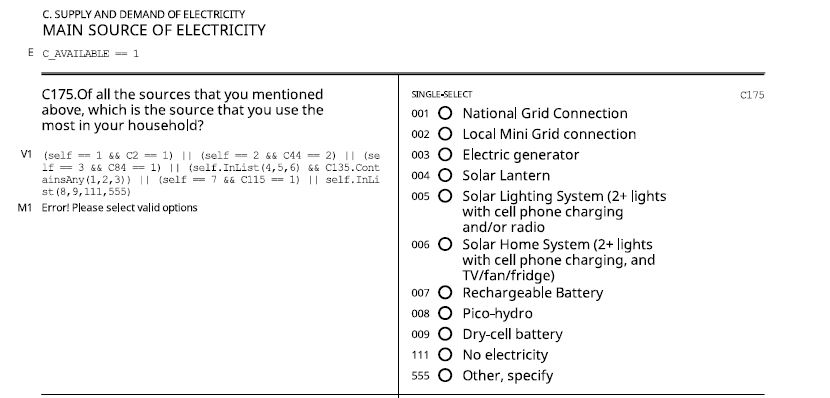

In [13]:
Image('references/MainSource_electricity_Nepal.JPG')

In [14]:



main_source_electricity = electricity_df["C175"]

# Column name renaming 
main_source_electricity.replace({1:'National Grid', 2:'Local mini grid',3:'Electric generator',4:'Solar lantern',5:'Solar Lighting',
                                6:'Solar Home System',7:'Rechargeable Battery',8:'Pico-hydro',9:'Dry cell battery',111:'No electricity',555:'Other'}, inplace=True)

#(len(main_source_electricity[main_source_electricity ==555])/6000 )*100    Percentage for people who answered other
# main_source_electricity.isnull().sum()
# There are non Nan values in this series
perc_main_electricity_source = (main_source_electricity.value_counts(normalize = True)*100)
perc_main_electricity_source





National Grid           67.450000
Solar Lighting          12.100000
Local mini grid         11.266667
No electricity           3.283333
Pico-hydro               2.316667
Dry cell battery         1.733333
Solar lantern            0.850000
Other                    0.666667
Solar Home System        0.266667
Rechargeable Battery     0.066667
Name: C175, dtype: float64

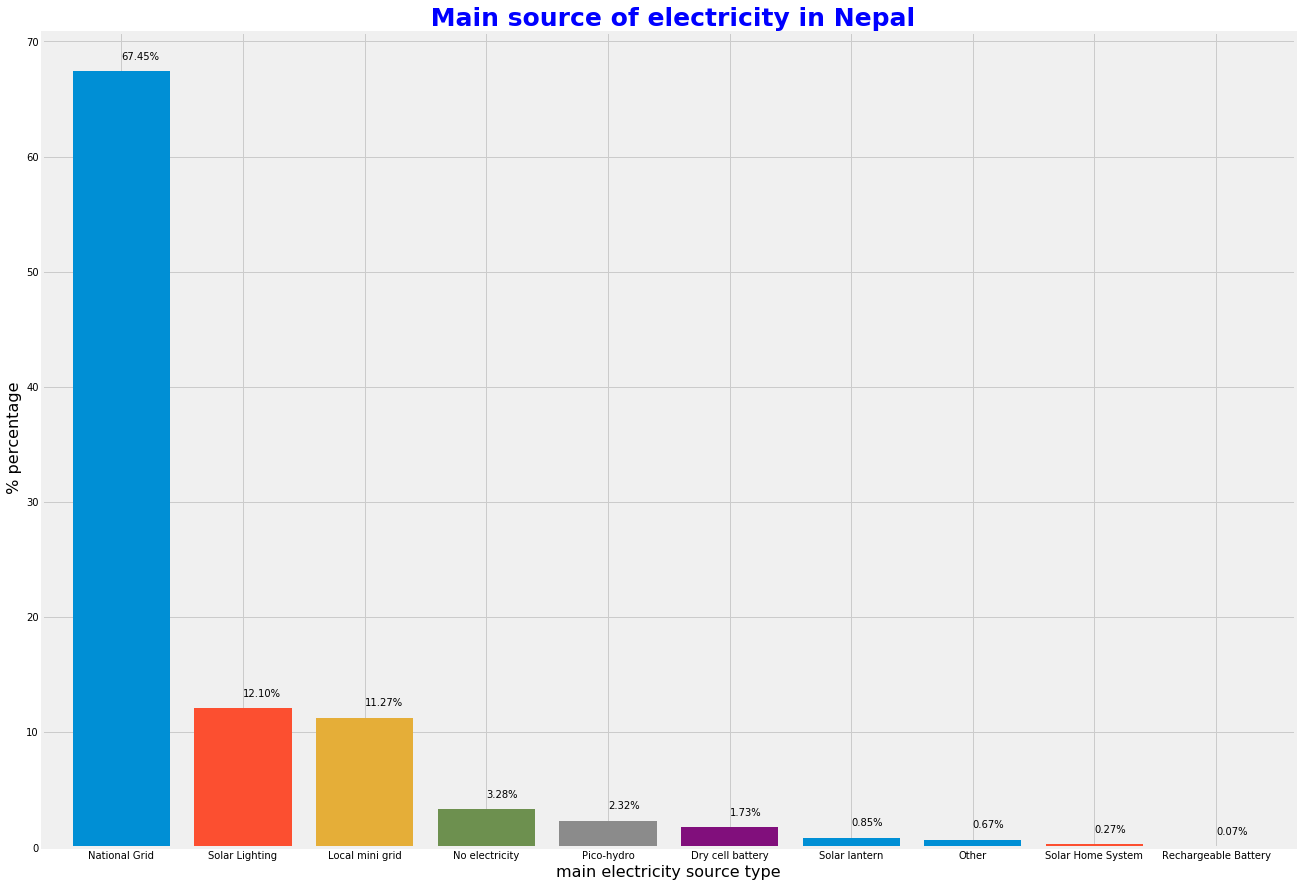

In [15]:
#Visualizing main source data 
perc_main_electricity_source.plot(kind = 'bar',width = 0.8,figsize=(20,15))
plt.xticks(rotation=0)
plt.title(" Main source of electricity in Nepal",fontweight='bold',fontsize=25,color='blue')
plt.ylabel(' % percentage',fontsize=16)
plt.xlabel('main electricity source type',fontsize = 16)

for index, value in enumerate(perc_main_electricity_source.values):
    plt.text(index,value+1, f'{value:.2f}%');


In [16]:
#Off connection this include solar Mini grid, Solar lighting , solar lantern , solar home system and Recheargeable battery
off_grid_perc = perc_main_electricity_source['Solar Lighting'] + perc_main_electricity_source['Solar lantern'] + perc_main_electricity_source['Solar Home System'] + perc_main_electricity_source['Rechargeable Battery'] + perc_main_electricity_source['Local mini grid'] 
np.ceil(off_grid_perc) 

# from raw data, The off grid system is 25%

25.0

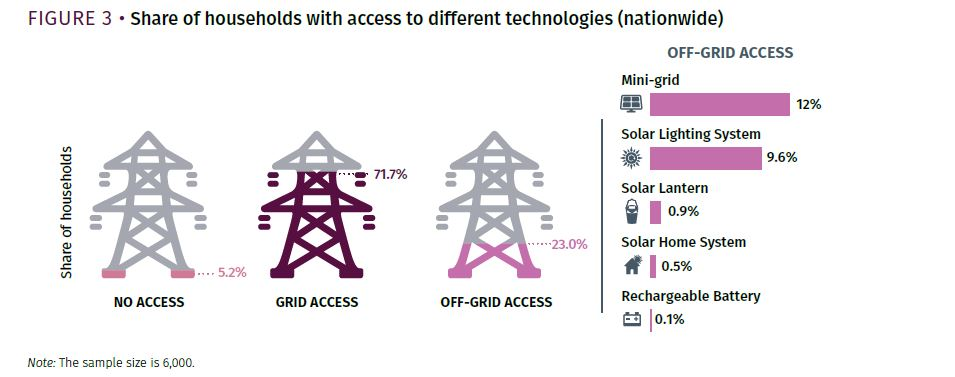

In [17]:
Image('references/main_source_electricity_Report.JPG')


### Most serious problem with the grid

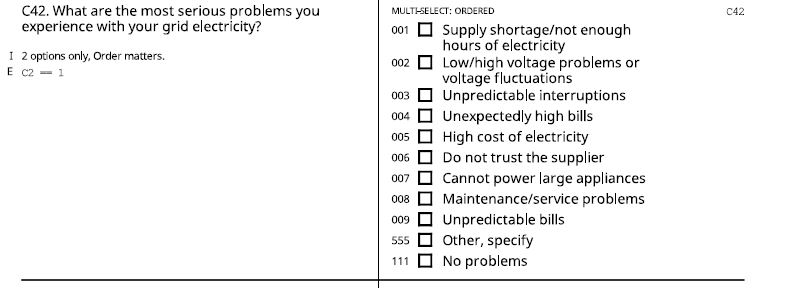

In [19]:
Image('references/grid_connectionproblems_Nepal.JPG')

In [20]:


grid_Problem_respone_colmns  = [column for column in c_section if column.startswith('C42')]
grid_connection_problems = electricity_df[grid_Problem_respone_colmns]
grid_connection_problems1 = grid_connection_problems.copy()

grid_connection_problems1.head()


,C42_SO,C42_SO_Recode,C42__1,C42__111,C42__2,C42__3,C42__4,C42__5,C42__555,C42__6,C42__7,C42__8,C42__9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
grid_connection_challenges = grid_connection_problems1.drop(grid_connection_problems1.columns[0:2],axis=1)
grid_connection_challenges.fillna(0,inplace = True)
grid_connection_challenges.tail()





,C42__1,C42__111,C42__2,C42__3,C42__4,C42__5,C42__555,C42__6,C42__7,C42__8,C42__9
5995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5998,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5999,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
columns_mapping = {'C42__1':'supply shortage','C42__111':'No problems','C42__2':'Voltage fluctuations','C42__3':'Interruption','C42__4':'Unexpected high bills',
                   'C42__5':'High electricity cost',
                  'C42__555':'Other','C42__6':'not trust supplier','C42__7':'not power large appliances','C42__8':'service issues',
                  'C42__9':'Unpredictable bills'}

grid_connection_challenges = grid_connection_challenges.rename(columns = columns_mapping)

grid_connection_challenges.head()

,supply shortage,No problems,Voltage fluctuations,Interruption,Unexpected high bills,High electricity cost,Other,not trust supplier,not power large appliances,service issues,Unpredictable bills
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:

grid_connection_challenges = (grid_connection_challenges.sum()*100/6000).to_frame().reset_index().rename(columns = {'index':'Grid problems', 0:'% Population'})

In [24]:

grid_connection_challenges['% Population'] = grid_connection_challenges['% Population'].apply(lambda x: round(x,1))
grid_connection_challenges.head()

,Grid problems,% Population
0,supply shortage,25.3
1,No problems,6.7
2,Voltage fluctuations,48.1
3,Interruption,40.1
4,Unexpected high bills,5.5


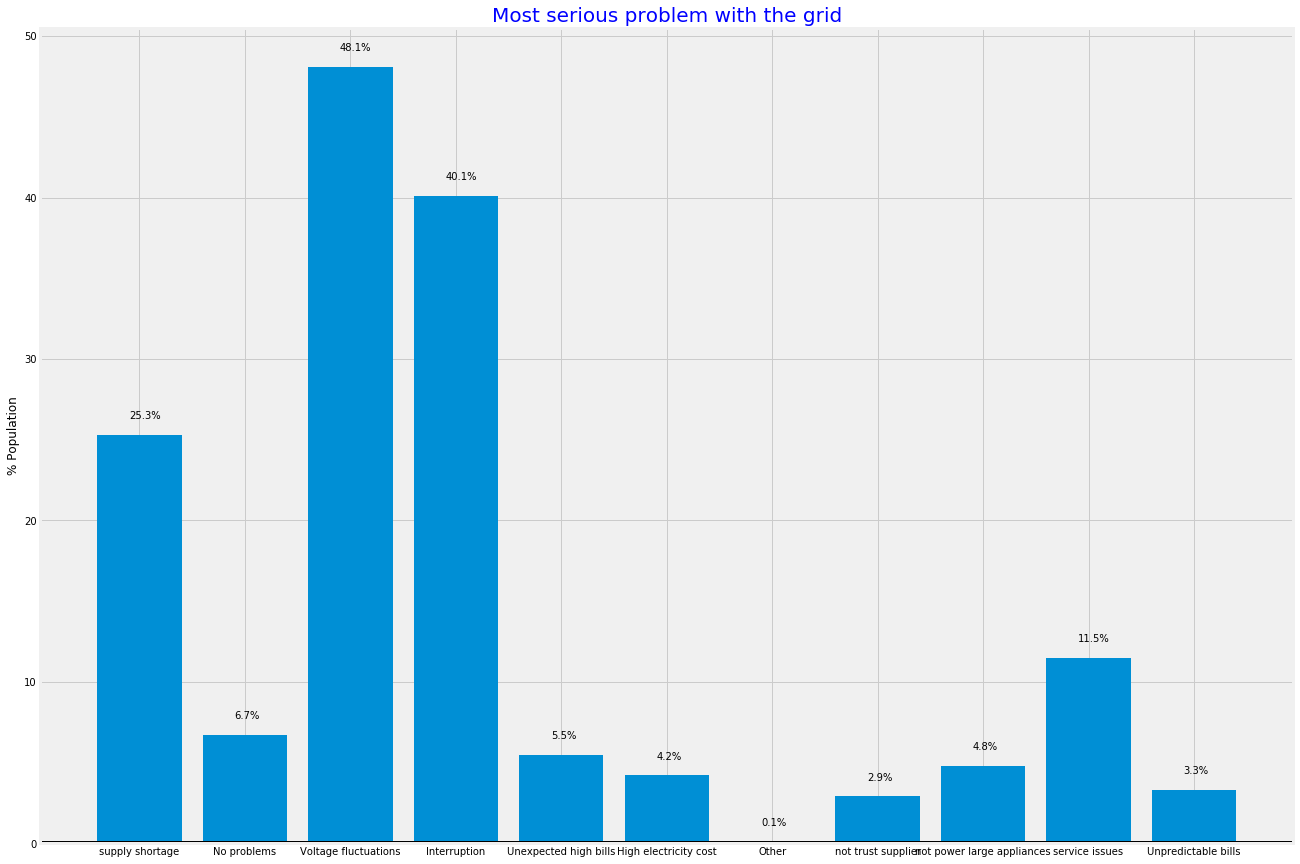

In [25]:
# Visualizing the above information 
plt.figure(figsize = (20,15))
plt.bar(grid_connection_challenges['Grid problems'], grid_connection_challenges['% Population']);
plt.axhline(0, color = 'black')
plt.title('Most serious problem with the grid',fontsize = 20,color = 'blue')
plt.ylabel('% Population')
#plt.xlabel('')
for i,pop in enumerate(grid_connection_challenges['% Population']):
    plt.text(i-0.1,pop+1, f'{pop}%')

Most serious problem from ESMAP report

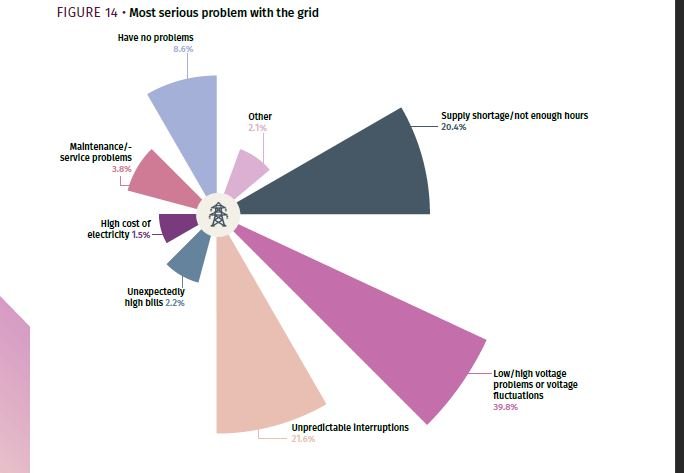

In [26]:
Image('references/most_serious_grid_problem.JPG')

### Access to Electricity through Multi Tier Framework analysis (Nepal)

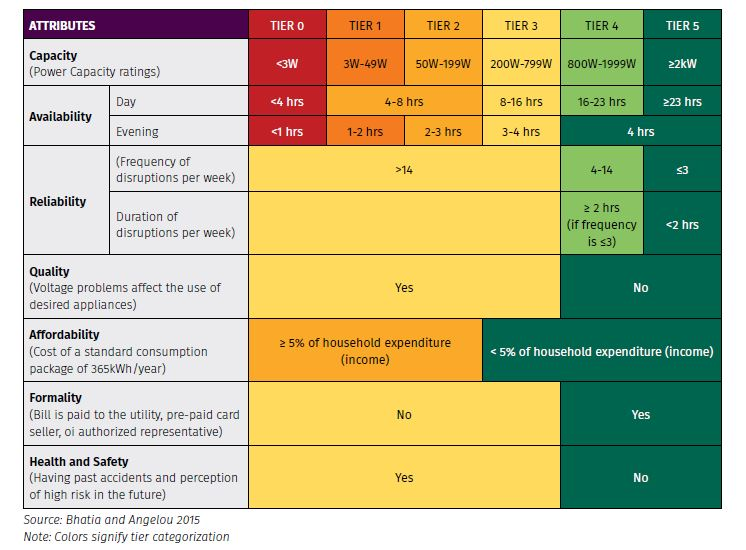

In [27]:
Image("references/MTF_Criteria_Nepal.JPG")

#### Rule for aggregating the households'MTF: 

A household’s aggregate tier allocation is based on its performance across the seven attributes
measuring access, and the lowest tier level among the attributes is considered its final aggregate tier.

#### Availability of electricity according to main source of electricity

This section examined Whole day and evening availability for typical month from the belo main source :
- National grid
- Mini grid
- Generator
- Rechargeable battery 
- pico 
- Solar based devices



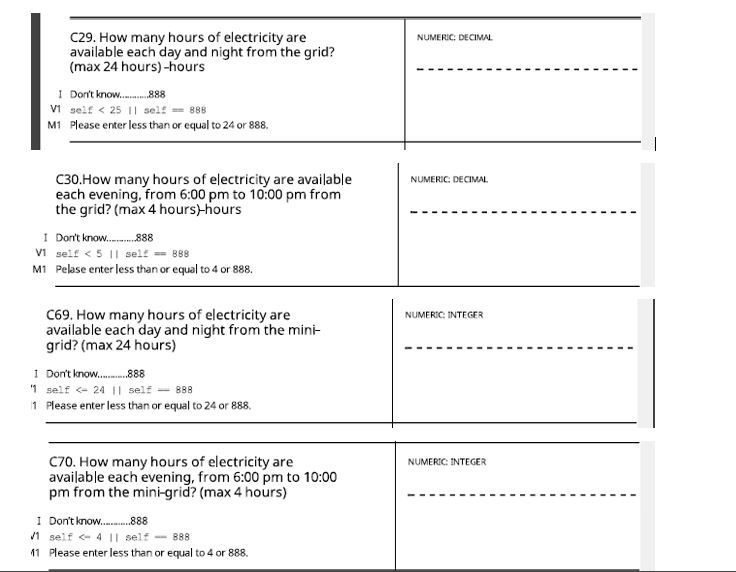

In [29]:
Image("references/availability_questions1.JPG")

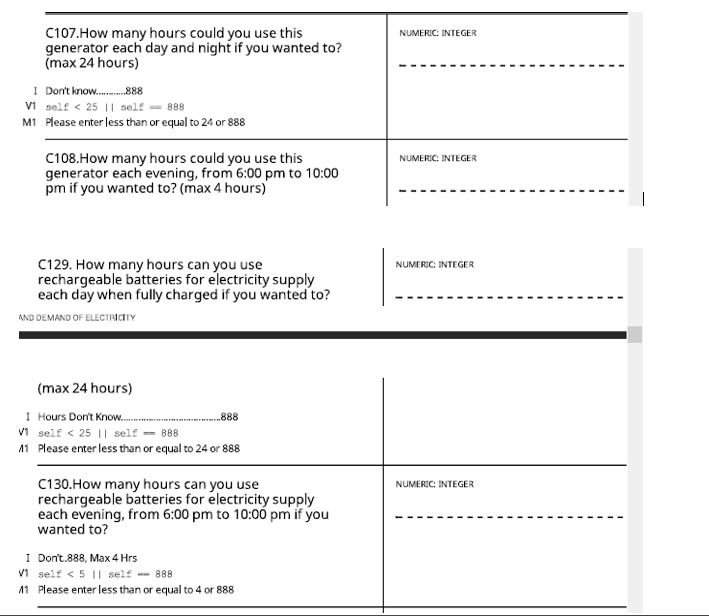

In [30]:
Image("references/availability_questions2.JPG")

In [39]:
electricity_df["C129"].head()
# Why all data are NANs?

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: C129, dtype: float64

### Reliability
Questions related to Reliability are as follows: 